In [14]:
from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime as utc
import seaborn as sns
from Catalog import inspector
import Catalog

In [ ]:
# from obspy.clients.fdsn.header import URL_MAPPINGS
# for key in sorted(URL_MAPPINGS.keys()):
#     print("{0:<11} {1}".format(key,  URL_MAPPINGS[key]))  
#     try:
#         client = Client(key)
#         t1 = utc("2020-01-01T00:00:00")
#         t2 = utc("2020-01-01T06:00:00")

#         t1 = utc(2015, 1, 1)
#         t2 = t1 + 10 * 24 * 60 * 60  # Ten days

#         cat = client.get_events(starttime=t1, endtime=t2, minmagnitude=4.5,
#                                 includearrivals=True)
#         npicks = sum([len(ev.picks) for ev in cat])
#         print('number', npicks)
#         if npicks != 0:
#             p = 0
#             s = 0
#             n = 0
#             for ev in cat:
#                 for pick in ev.picks:
#                     if pick.phase_hint == None:
#                         n += 1
#                         continue
#                     if pick.phase_hint.upper()[0] == 'P':
#                         p += 1
#                     elif pick.phase_hint.upper()[0] == 'S':
#                         s += 1
#                     else:
#                         n += 1
#             print(p, s, n)
#     except Exception as error:
#         print(error)

In [2]:
client = Client("ETH", timeout=10)
t0 = utc(2015, 1, 1)
t1 = t0 + 10 * 24 * 60 * 60  # Ten days
cat = client.get_events(t0, t1, includearrivals=True)

KeyboardInterrupt: 

In [ ]:
p = 0
s = 0
n = 0
for ev in catalog:
    for pick in ev.picks:
        if pick.phase_hint == None:
            n += 1
            continue
        if pick.phase_hint.upper()[0] == 'P':
            p += 1
        elif pick.phase_hint.upper()[0] == 'S':
            s += 1
        else:
            n += 1
print(p, s, n)

In [3]:
client = Client("ISC")
t1 = utc("2020-01-01T00:00:00")
t2 = utc("2020-01-02T00:00:00")
cat = client.get_events(starttime=t1, endtime=t2, minmagnitude=4.5,
                        includearrivals=True, includeallorigins=False)

KeyboardInterrupt: 

In [3]:
from obspy import read_events
cat1 = read_events('/home/iman/Documents/Ilam_s1.out')

/home/iman/Applications/ObsPy_1.4.0/lib/python3.10/site-packages/obspy/io/nordic/utils.py:184: UserWarning: Lines of type I have not been implemented yet, please submit a development request
  warnings.warn("Lines of type %s have not been implemented yet, "


In [12]:
import sys
print('Catalog' in sys.modules) #True

True


In [15]:
import importlib
importlib.reload(Catalog)

<module 'Catalog' from '/home/iman/Documents/GitHub/SeisRoutine/Catalog.py'>

In [16]:
insp = Catalog.inspector(catalog=cat1)

Number of calculated s-p: 4853
Number of all phases: 14643
Number of P-type phases: 9798
Number of S-type phases: 4844


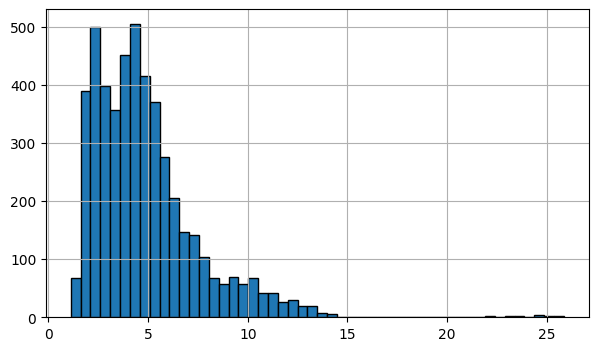

In [17]:
insp.plot_hist_SminusP(bins=50)

In [ ]:
insp.plot_bar_phasetype()

In [ ]:
df = insp.df_phases
keys = ['otime', 'resource_id', 'network', 'station', 'phase', 'time']
df_p = df[df['phase']=='Pg'][keys]
df_s = df[df['phase']=='Sg'][keys]
df_p['otime'] = df_p['otime'].apply(lambda x: x.timestamp)
df_s['otime'] = df_s['otime'].apply(lambda x: x.timestamp)

In [ ]:
df['phase'].str.upper().str.startswith('P')

In [ ]:
a = 'sdf'
a.st

In [ ]:
df_p

In [ ]:
df_s

In [ ]:
print(df_p.shape, df_s.shape)

In [ ]:
df_merge = df_p.merge(df_s, how='inner', on=['station', 'network', 'otime'])
df_merge

In [ ]:
df_merge[['phase_x', 'phase_y']]

In [ ]:
sp = df_merge['time_y'] - df_merge['time_x']
sp.hist()

In [ ]:
df_merge.keys()

In [ ]:
insp.plot_residual_vs_distance()

In [ ]:
insp.plot_traveltime()

In [ ]:
insp.plot_hist_of_numeric(figsize=(8, 6), bins=30, edgecolor='k')

In [ ]:
insp.plot_pie_of_none_numeric()

In [ ]:
insp.plot_bar_of_none_numeric(figsize=(10, 4))

In [ ]:
def ps_delta(catalog):
    '''
    Doc-string
    '''
    list_ps_delta = []
    stations_ps_delta = {}
    for ev in catalog:
        stations_phases = {}
        for pick in ev.picks:
            if (pick.phase_hint is None) or ('A' in pick.phase_hint) or (pick.phase_hint == ''):
                continue
            if pick.waveform_id.station_code not in stations_phases.keys():
                stations_phases[pick.waveform_id.station_code] = {}
            stations_phases[pick.waveform_id.station_code][pick.phase_hint] = pick.time
        for station, phases in stations_phases.items():
            if len(phases) == 2:
                ps_delta = phases['S'] - phases['P']
                list_ps_delta.append(ps_delta)
                if station not in stations_ps_delta.keys():
                    stations_ps_delta[station] = []
                stations_ps_delta[station].append(ps_delta)
    return stations_ps_delta

In [ ]:
insp.df_phases.keys()

In [ ]:
insp.df_phases[['resource_id', 'network', 'station', 'phase_hint', 'time']]
df_p = insp.df_phases['phase_hint'].upper()[0]=='P'
df_s = insp.df_phases['phase_hint'].upper()[0]=='S'

df_p = insp.df_phases[df_p]
df_s = insp.df_phases[df_s]

In [ ]:
def ps_delta(catalog, method='network', **kwargs):
    '''
    interval between p and s phases of events in same stations.
    for select length of template phases.
    '''
    list_ps_delta = []
    stations_ps_delta = {}
    for ev in catalog:
        stations_phases = {}
        for pick in ev.picks:
            if (pick.phase_hint is None) or ('A' in pick.phase_hint) or (pick.phase_hint == ''):
                continue
            station_name = pick.waveform_id.station_code
            phase = pick.phase_hint
            if station_name not in stations_phases.keys():
                stations_phases[station_name] = {}
            stations_phases[station_name][phase[0]] = pick.time
        for station, phases in stations_phases.items():
            if len(phases) == 2:
                ps_delta = phases['S'] - phases['P']
                list_ps_delta.append(ps_delta)
                if station not in stations_ps_delta.keys():
                    stations_ps_delta[station] = []
                stations_ps_delta[station].append(ps_delta)
    if method == 'network' or method == 'both':
        print('max:', max(list_ps_delta))
        print('min:', min(list_ps_delta))
        counts, bins = np.histogram(list_ps_delta, bins=40)
        fig = plt.figure(figsize=(8, 6))
        ax = plt.gca()
        ax.yaxis.set_tick_params(labelsize=15)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        plt.hist(bins[:-1], bins, weights=counts, edgecolor='black', linewidth=1.2)
        plt.xticks(list(range(round(max(bins))+1)), fontsize=15)
        plt.xlabel('Interval of P-S pairs [S]', fontsize=17)
        plt.ylabel('Abundance [Count]', fontsize=17)
        plt.title('Ilam reference catalog', fontsize=25)#, weight='bold')
        kwargs.update(savefile=join(kwargs['path'], 'network.png'))
        fig = _finalise_figure(fig=fig, **kwargs)
    if method == 'stations' or method == 'both':
        for station, deltas in stations_ps_delta.items():
            print(station)
            print('max:', max(deltas))
            print('min:', min(deltas))
            counts, bins = np.histogram(deltas, bins=40)
            fig = plt.figure(figsize=(8, 6))
            plt.hist(bins[:-1], bins, weights=counts)
            plt.xlabel('Interval of P-S pairs [S]')
            plt.ylabel('Abundance')
            plt.title(station)
            kwargs.update(savefile=join(kwargs['path'], f'{station}.png'))
            fig = _finalise_figure(fig=fig, **kwargs)
